# Prédiction du Statut Fumeur

### Réalisé par Phillippe Miracle Towanou VODOUMBO

## Objectif du Projet
Dans ce projet, l'objectif est de développer un modèle de prédiction du statut de fumeur ou non fumeur en utilisant des techniques d'apprentissage automatique.



## Données

La base de données utilisée pour faire cet apprentissage provient  du site Kaggle. Cette base de données contient *159256* et *22* variables.

## Étapes du Notebook
1. Importation des bibliothèques
2. Chargement des données
3. Exploration des données
4. Prétraitement des données
5. Construction du modèle
6. Entraînement du modèle
7. Évaluation du modèle
8. Conclusion et Perspectives




### 1- Importation des bibliothèques

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.ensemble import RandomForestClassifier 

### 2- Chargement des données

In [2]:
# Lecture du fichier CSV dans un DataFrame
df = pd.read_csv("train.csv")

# Suppression de la colonne "id"
df.drop(columns='id', inplace=True)

# Affichage des cinq premières lignes du DataFrame
df.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
df.shape

(159256, 23)

### 3- Exploration des données

In [4]:
# Affichage des noms de colonnes du DataFrame
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [5]:
# Affichage des informations sur le DataFrame, notamment le type de données de chaque colonne et les valeurs non nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

In [6]:
# Affichage des types de données de chaque colonne dans le DataFrame
df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [7]:
# Affiche le nombre de valeurs manquantes (NaN) dans chaque colonne du DataFrame
print("Nan in each columns" , df.isna().sum(), sep='\n')

Nan in each columns
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


### Smoking vs variables quantitatives



In [8]:
# Affiche des statistiques descriptives pour les colonnes numériques du DataFrame
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [9]:
# Sélection des colonnes numériques et calcul de la corrélation
numeric_df = df.drop(columns=['dental caries', 'hearing(left)', 'hearing(right)'])
corr = numeric_df.corr()
corr


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
age,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.160437,0.064924,0.191913,0.106873,-0.038063,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.206033
height(cm),-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,0.062297,0.114390,0.017516,-0.113455,0.252464,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.447111
weight(kg),-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,0.241495,0.265921,0.132409,0.020382,0.384313,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.351748
waist(cm),-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.306150,0.291389,0.209541,0.075039,0.394593,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.262715
eyesight(left),-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.030718,0.010324,-0.048066,-0.014211,0.057775,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.100420
eyesight(right),-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.026931,0.017073,-0.047424,-0.011569,0.063572,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.109781
systolic,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,1.000000,0.753003,0.176127,0.069044,0.161187,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.058642
relaxation,0.064924,0.114390,0.265921,0.291389,0.010324,0.017073,0.753003,1.000000,0.152416,0.100405,0.196251,-0.127218,0.073838,0.230445,-0.020445,0.091648,0.090398,0.130043,0.186684,0.109501
fasting blood sugar,0.191913,0.017516,0.132409,0.209541,-0.048066,-0.047424,0.176127,0.152416,1.000000,0.028153,0.176266,-0.128273,0.010165,0.094061,0.009406,0.057923,0.041653,0.082907,0.148289,0.096534
Cholesterol,0.106873,-0.113455,0.020382,0.075039,-0.014211,-0.011569,0.069044,0.100405,0.028153,1.000000,0.237904,0.165758,0.808533,0.032104,-0.030821,-0.008407,0.051192,0.072839,0.099871,-0.051896


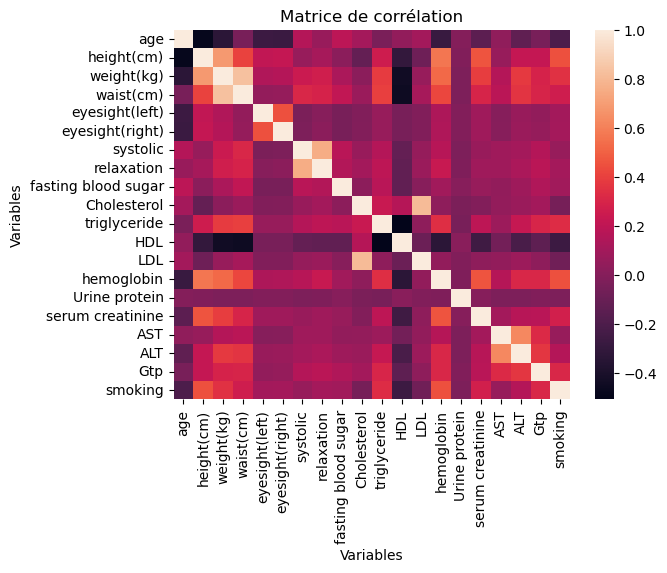

In [10]:
# Affichage de la matrice de corrélation sous forme de heatmap
sns.heatmap(corr)
plt.title("Matrice de corrélation")
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [11]:
# Sélection des corrélations avec la variable cible 'smoking'
corr_p = corr[['smoking']].drop("smoking", axis=0)

# Réinitialisation de l'index
corr_p = corr_p.reset_index()

# Renommage des colonnes pour la lisibilité
corr_p = corr_p.rename(columns={'index': "Caractéristiques", "smoking": "Correlation"})

# Transformation des valeurs de corrélation en valeurs absolues
corr_p['Correlation'] = abs(corr_p['Correlation'])

# Tri des corrélations par ordre décroissant
corr_p = corr_p.sort_values("Correlation", ascending=False)

# Affichage des 10 premières corrélations
corr_p.head(10)



,Caractéristiques,Correlation
13,hemoglobin,0.450679
1,height(cm),0.447111
2,weight(kg),0.351748
10,triglyceride,0.331975
18,Gtp,0.305561
15,serum creatinine,0.272979
11,HDL,0.271186
3,waist(cm),0.262715
0,age,0.206033
17,ALT,0.163016


In [12]:
# Liste des variables numériques
numeric_var = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp']

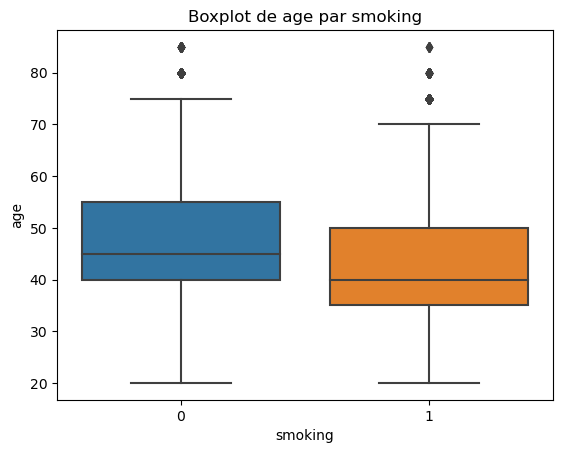

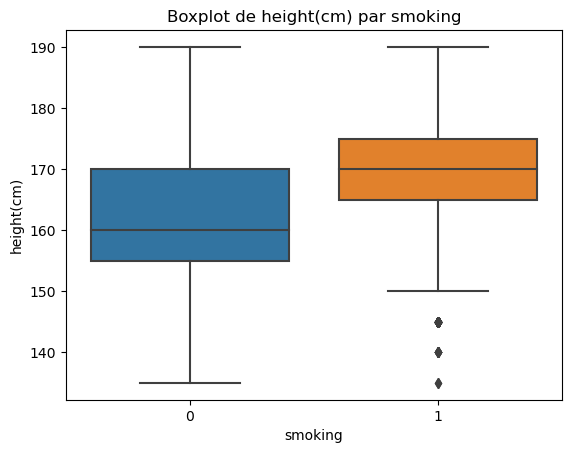

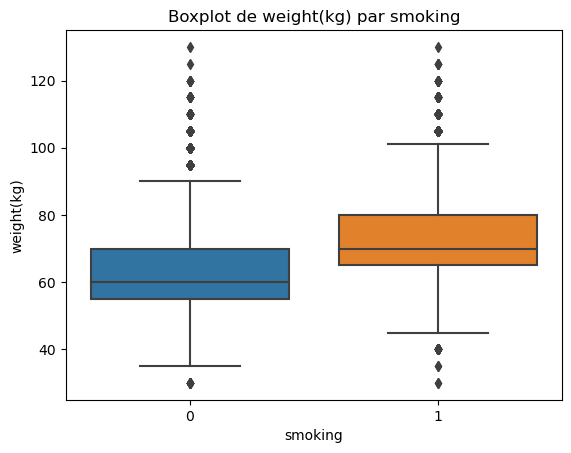

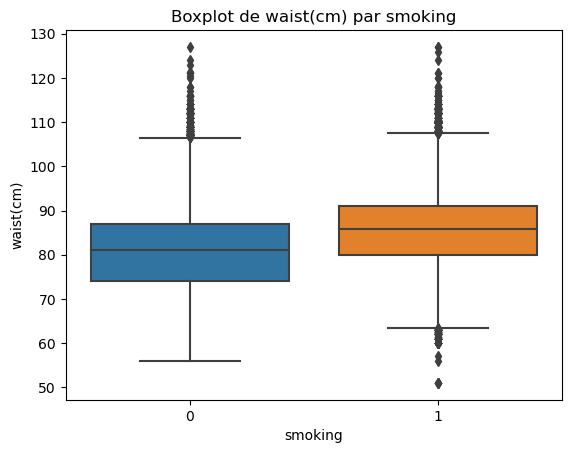

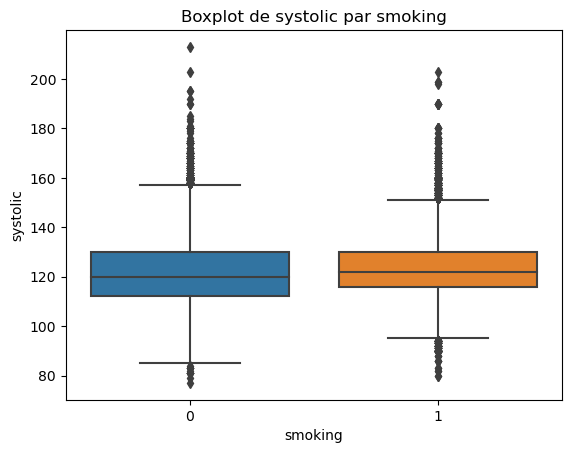

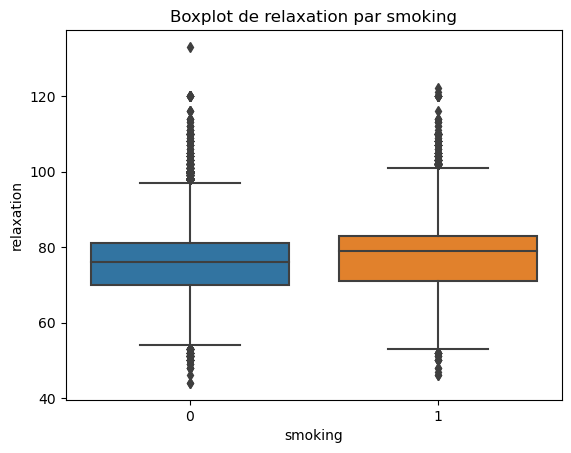

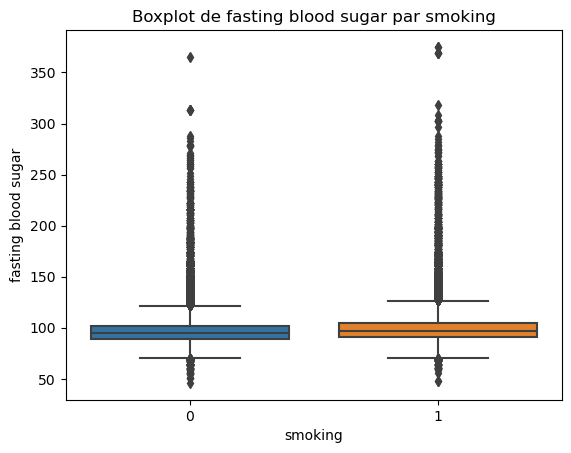

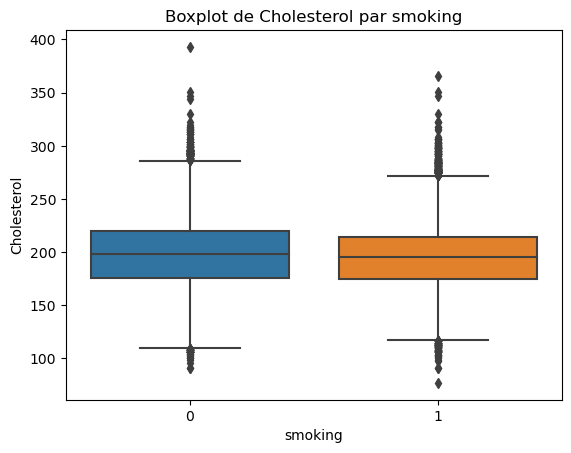

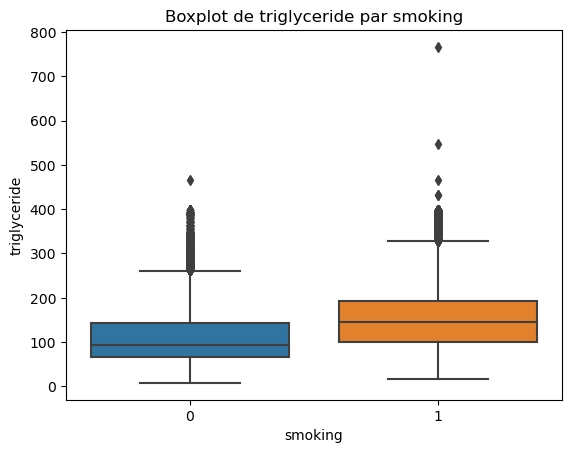

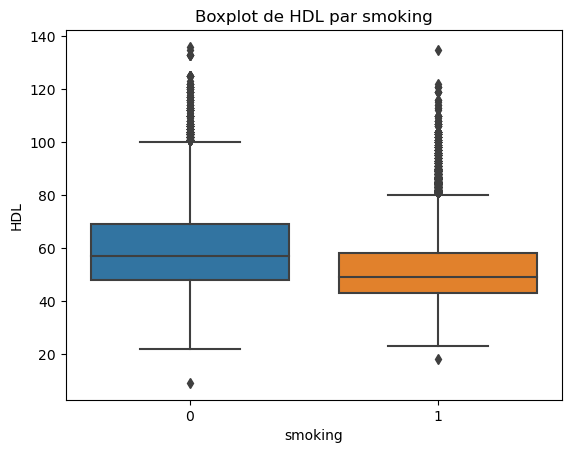

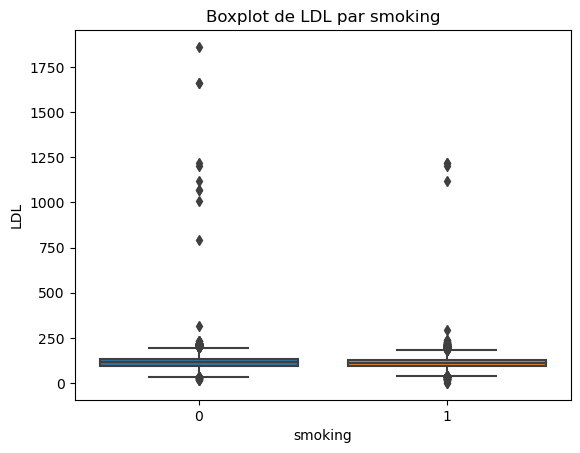

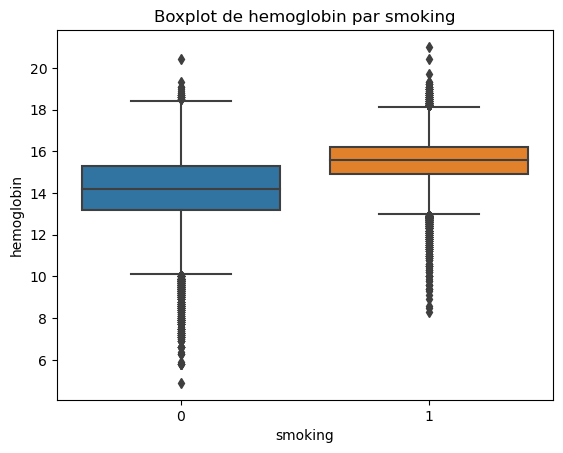

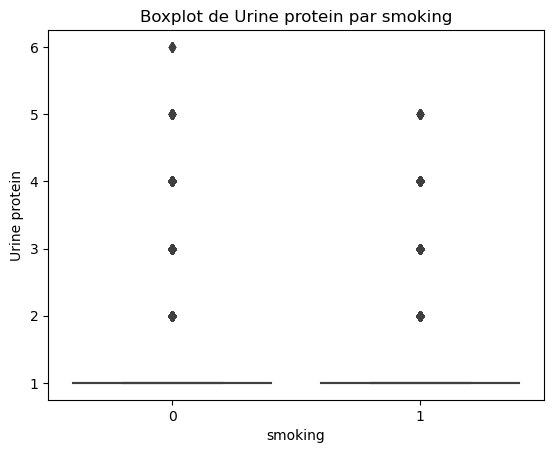

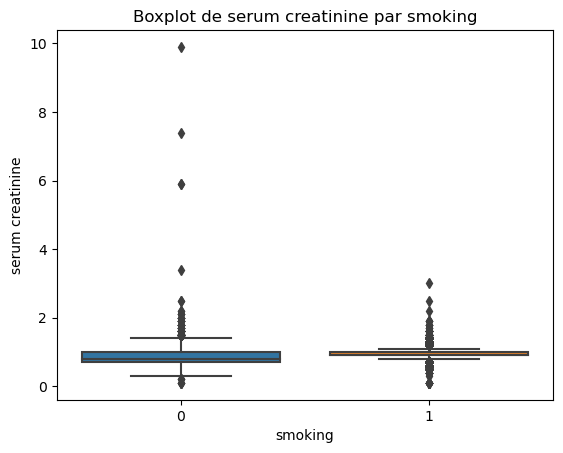

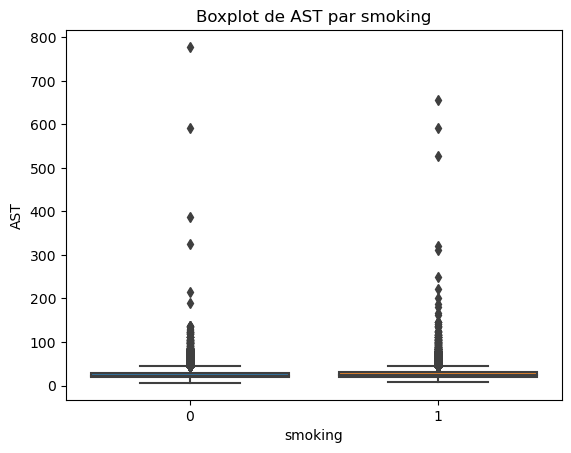

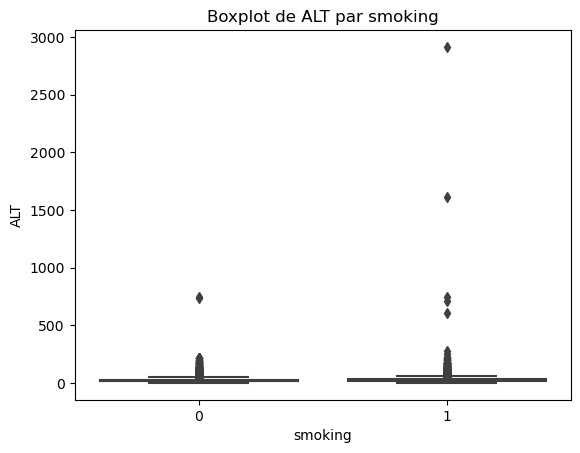

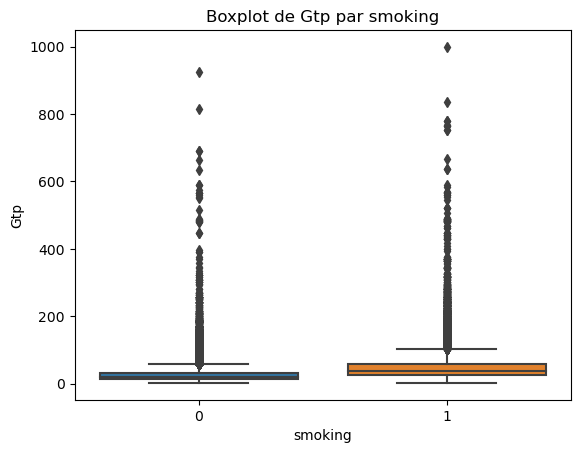

In [13]:
# Boxplots pour chaque variable numérique en fonction du statut de fumeur
for n_var in numeric_var:
    sns.boxplot(x="smoking", y=n_var, data=df)

    # Ajouter des étiquettes et un titre
    plt.xlabel('smoking')
    plt.ylabel(n_var)
    plt.title(f'Boxplot de {n_var} par smoking')

    # Afficher le graphique
    plt.show()


In [14]:
# Calcul de la moyenne de l'hémoglobine pour chaque statut de fumeur
Moyenne_hem = df.groupby('smoking')['hemoglobin'].mean().reset_index()

# Renommer les colonnes
Moyenne_hem.columns = ['Smoking status', 'Hemoglobine']

# Remplacer les valeurs dans la colonne 'Smoking status'
Moyenne_hem['Smoking status'] = Moyenne_hem['Smoking status'].replace({0: 'No', 1: 'Yes'})

Moyenne_hem

,Smoking status,Hemoglobine
0,No,14.228271
1,Yes,15.528544


In [15]:
# Calcul de la moyenne de Gtp pour chaque statut de fumeur
Moyenne_Gtp = df.groupby('smoking')['Gtp'].mean().reset_index()

# Renommer les colonnes
Moyenne_Gtp.columns = ['Smoking status', 'Gtp']

# Remplacer les valeurs dans la colonne 'Smoking status'
Moyenne_Gtp['Smoking status'] = Moyenne_Gtp['Smoking status'].replace({0: 'No', 1: 'Yes'})

Moyenne_Gtp


,Smoking status,Gtp
0,No,27.809326
1,Yes,47.030523


In [16]:
Moyenne_hgt = df.groupby('smoking')['height(cm)'].mean().reset_index()
Moyenne_hgt.columns = ['Smoking status','height(cm)']

# Remplacer les valeurs dans la colonne 'Smoking status'
Moyenne_hgt['Smoking status'] = Moyenne_hgt['Smoking status'].replace({0: 'No', 1: 'Yes'})


Moyenne_hgt

,Smoking status,height(cm)
0,No,161.790442
1,Yes,169.739150


### Smoking vs variables qualitatives

In [17]:
# Liste des noms des variables explicatives qualitatives
qualitative_explanatory_variables = ["dental caries", "hearing(right)", "hearing(left)"]



# Réglages de la grille
sns.set(style="whitegrid")

for exp_var in qualitative_explanatory_variables:
    # Créer une table de contingence
    contingency_table = pd.crosstab(index=df[exp_var], columns=df['smoking'])
    
    # Effectuer le test du chi2
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Imprimer les résultats du test du chi2
    print(f"\nTest du Chi2 pour {exp_var} par rapport à smoking:")
    print(f"Statistique Chi2 : {chi2_stat}, p-value : {p_value}")


Test du Chi2 pour dental caries par rapport à smoking:
Statistique Chi2 : 1810.4064771591138, p-value : 0.0

Test du Chi2 pour hearing(right) par rapport à smoking:
Statistique Chi2 : 215.8562999432632, p-value : 7.248840567862082e-49

Test du Chi2 pour hearing(left) par rapport à smoking:
Statistique Chi2 : 232.11914223131788, p-value : 2.0568471200329436e-52


### 4- Prétraitement des données

In [18]:
# Compter le nombre de valeurs uniques pour chaque feature sélectionnée
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking']

for f in features: 
    print (f"Nombre de valeurs uniques pour {f} :")
    print (df[f].nunique())


Nombre de valeurs uniques pour age :
18
Nombre de valeurs uniques pour height(cm) :
14
Nombre de valeurs uniques pour weight(kg) :
28
Nombre de valeurs uniques pour waist(cm) :
531
Nombre de valeurs uniques pour eyesight(left) :
20
Nombre de valeurs uniques pour eyesight(right) :
17
Nombre de valeurs uniques pour hearing(left) :
2
Nombre de valeurs uniques pour hearing(right) :
2
Nombre de valeurs uniques pour systolic :
112
Nombre de valeurs uniques pour relaxation :
75
Nombre de valeurs uniques pour fasting blood sugar :
229
Nombre de valeurs uniques pour Cholesterol :
227
Nombre de valeurs uniques pour triglyceride :
392
Nombre de valeurs uniques pour HDL :
108
Nombre de valeurs uniques pour LDL :
222
Nombre de valeurs uniques pour hemoglobin :
134
Nombre de valeurs uniques pour Urine protein :
6
Nombre de valeurs uniques pour serum creatinine :
28
Nombre de valeurs uniques pour AST :
140
Nombre de valeurs uniques pour ALT :
188
Nombre de valeurs uniques pour Gtp :
362
Nombre de val

Les variables 'age' et 'urin protein' bien qu'etant quantitative de base n'ont pas assez de modalaités uniques. Pour cela, je procède à leurs catégorisations. Les variables qui n'ont que deux modalités seront labeliséés en 0 et 1. 

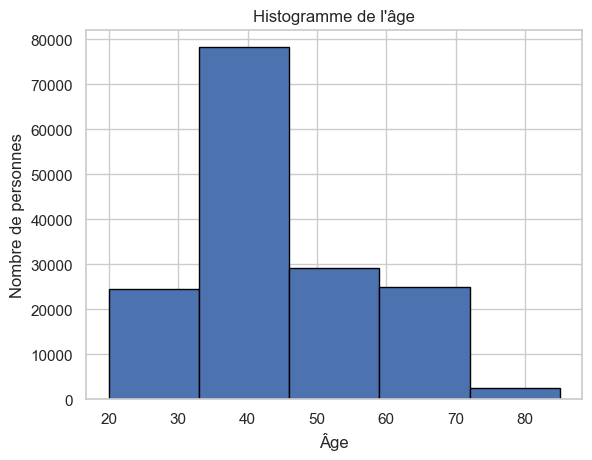

In [19]:
# Tracer l'histogramme de la variable 'age'
plt.hist(df['age'], bins=5, edgecolor='black')
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.title('Histogramme de l\'âge')
plt.show()

In [20]:
# Création de catégories d'âge
bins = [20, 35, 70, 90]
labels = ["Jeune", "Adulte", "Vieux"]
df['categorie_age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['categorie_age']

0         Adulte
1          Vieux
2          Jeune
3         Adulte
4          Jeune
           ...  
159251    Adulte
159252    Adulte
159253    Adulte
159254    Adulte
159255    Adulte
Name: categorie_age, Length: 159256, dtype: category
Categories (3, object): ['Jeune' < 'Adulte' < 'Vieux']

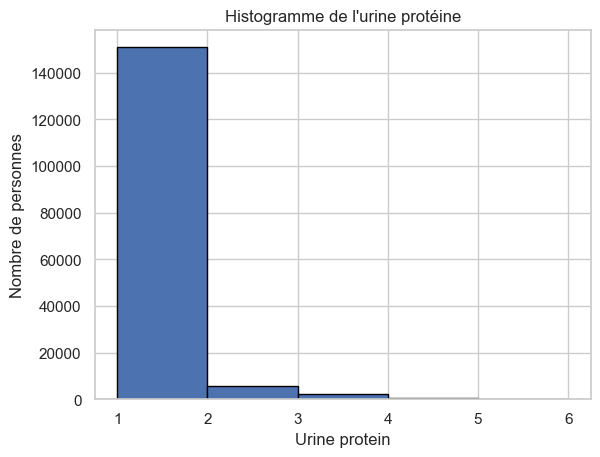

In [21]:
# Tracer un histogramme pour la variable 'Urine protein' avec 5 bacs

plt.hist(df['Urine protein'], bins=5, edgecolor='black')
plt.xlabel('Urine protein')
plt.ylabel('Nombre de personnes')
plt.title('Histogramme de l\'urine protéine')
plt.show()

On remarque que deux classes ressortent clairement de cet histogramme pour la variable **urine protein**. 

In [22]:
# Création d'une nouvelle variable 'categorie_up' basée sur la variable 'Urine protein'
bins = [1, 2, 6]
labels = ["Faible", "Élevé"]
df['categorie_up'] = pd.cut(df['Urine protein'], bins=bins, labels=labels, right=False)
df['categorie_up']

0         Faible
1         Faible
2         Faible
3         Faible
4         Faible
           ...  
159251    Faible
159252    Faible
159253    Faible
159254    Faible
159255    Faible
Name: categorie_up, Length: 159256, dtype: category
Categories (2, object): ['Faible' < 'Élevé']

In [23]:
# Encoder les variables catégorielles binaires avec LabelEncoder
label_encoder = LabelEncoder()
df['dental_caries_encoded'] = label_encoder.fit_transform(df['dental caries'])
df['h_left_encoded'] = label_encoder.fit_transform(df['hearing(left)'])
df['h_right_encoded'] = label_encoder.fit_transform(df['hearing(right)'])
df['categorie_up_encoded'] = label_encoder.fit_transform(df['categorie_up'])


In [24]:
# Encoder les variables catégorielles avec plus de deux modalités avec OneHot Encoding
from sklearn.preprocessing import OneHotEncoder


# Initialiser l'encodeur
encoder = OneHotEncoder(sparse=False)

# Adapter et transformer les données
df_encoded = pd.DataFrame(encoder.fit_transform(df[['categorie_age']]), columns=encoder.get_feature_names_out(['categorie_age']))

# Ajouter les colonnes encodées au dataframe d'origine
df = pd.concat([df, df_encoded], axis=1)



D:\Programme\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'categorie_age',
       'categorie_up', 'dental_caries_encoded', 'h_left_encoded',
       'h_right_encoded', 'categorie_up_encoded', 'categorie_age_Adulte',
       'categorie_age_Jeune', 'categorie_age_Vieux'],
      dtype='object')

In [26]:
columns_to_standardize = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp']

# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation uniquement sur les colonnes sélectionnées
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


df.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,smoking,categorie_age,categorie_up,dental_caries_encoded,h_left_encoded,h_right_encoded,categorie_up_encoded,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Vieux
0,55,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,1,1,0.981702,1.125777,...,1,Adulte,Faible,0,0,0,0,1.0,0.0,0.0
1,70,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,2,2,1.845852,0.681066,...,0,Vieux,Faible,1,1,1,0,0.0,0.0,1.0
2,20,0.536694,0.624205,-0.223489,-1.506543,-1.277064,1,1,-0.353802,-0.208355,...,1,Jeune,Faible,0,0,0,0,0.0,1.0,0.0
3,35,1.670617,2.213252,2.455708,1.229017,0.507296,1,1,0.667465,1.236955,...,0,Adulte,Faible,1,0,0,0,1.0,0.0,0.0
4,30,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,1,1,-0.118125,-0.097177,...,1,Jeune,Faible,0,0,0,0,0.0,1.0,0.0


### 5- Construction du modèle

In [27]:
X = df[['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental_caries_encoded', 'h_left_encoded', 'h_right_encoded', 'categorie_up_encoded', 'categorie_age_Adulte',
       'categorie_age_Jeune', 'categorie_age_Vieux']]

y = df['smoking']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6- Entraînement du modèle

In [28]:
rf_params = {
        'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)],
            'max_depth': [int(x) for x in np.linspace(4, 20, num = 3)],
            'bootstrap': [True, False]
        }  
    }
}

scores = []

for model_name, mp in rf_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Affichage des valeurs optimales des hypers-paramètres
scores

[{'model': 'random_forest',
  'best_score': 0.7741201287233624,
  'best_params': {'bootstrap': False, 'max_depth': 20, 'n_estimators': 100}}]

### 7- Évaluation du modèle

In [29]:
#function to train and evaluate models
def evaluation(model):
   # X_train échantillon d'apprentissage et x_test échantillon test
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
       
    # Scores moyens
    score_moy=cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    print("Le score moyen est : {} \n ".format(round(score_moy*100,3)))
        
    #Computing False Positives(FP), False Negatives(FN), True Positive(TP) and True Negative(TN)
    cm=confusion_matrix(y_test,y_predict)
    TN,TP,FP,FN= cm[0,0], cm[1,1], cm[1,0], cm[0,1]
    
    
    # Métrique de performance
    Sensi,Speci,CE,ACC=TP/(FN+TP),TN/(TN+FP),(FP+FN)/(TN+TP+FP+FN),(TP+TN)/(TN+TP+FP+FN)
   
    #Average metrics
    print("The sensitivity is: {:.3f} % \n ".format(Sensi*100))
    print("The specificity is: {:.3f} % \n ".format(Speci*100))
    print("The classification error is: {:.3f} % \n ".format(CE*100))
    print("The accuracy is: {:.3f} % \n ".format(ACC*100))
    
    print("Rapport de la classification \n",classification_report(y_test,y_predict))

    

    ax = sns.heatmap(cm, annot=True)
    ax.set_title("Matrice de confusion")
    ax.set_xlabel('Classes Prédictes')
    ax.set_ylabel('Classes réelles')
    
    
    
    
    accuracy = accuracy_score(y_test, y_predict)
    # Calcul de la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Affichez les résultats
    print(f"Accuracy: {accuracy}")
    print(f"AUC-ROC: {roc_auc}")

    # Visualisez la courbe ROC
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    

    plt.show()

Le score moyen est : 77.335 
 
The sensitivity is: 70.871 % 
 
The specificity is: 83.076 % 
 
The classification error is: 23.088 % 
 
The accuracy is: 76.912 % 
 
Rapport de la classification 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78     17783
           1       0.71      0.81      0.76     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.78      0.77      0.77     31852

Accuracy: 0.7691196785131232
AUC-ROC: 0.8523254299238311


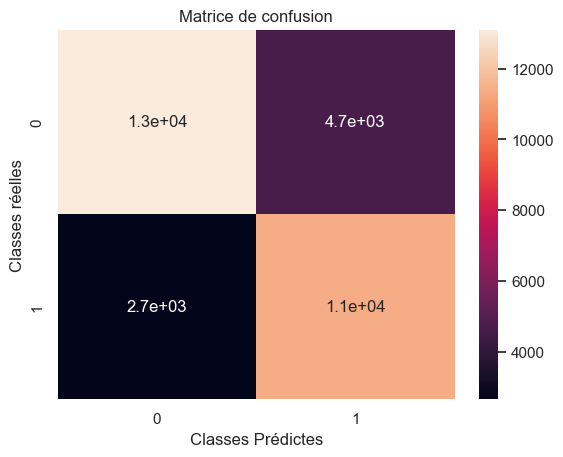

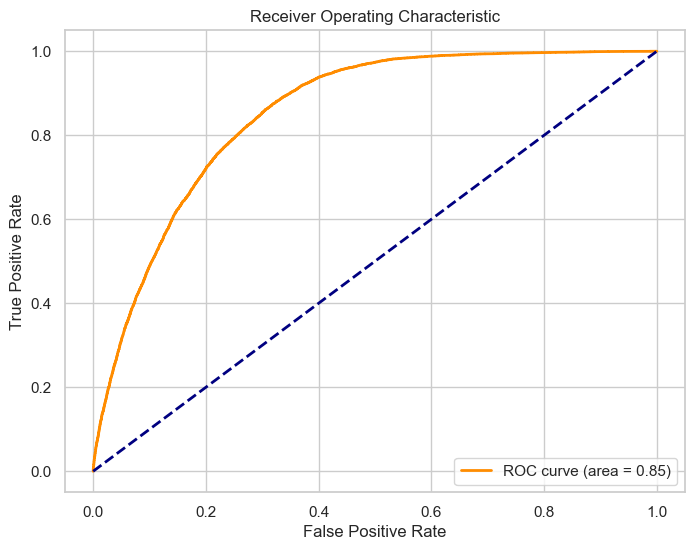

100 20 False


In [33]:
# Évaluation du modèle RandomForestClassifier avec des paramètres optimisés
best_params = scores[0]['best_params']
n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
bootstrap = best_params['bootstrap']
evaluation(RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth, bootstrap=bootstrap, random_state = 42))


 #### Le modèle parvient à capturer 70% des individus réellement positifs et a une capacité de 80% à exclure correctement les individus réellement négatifs. En effet, le modèle a correctement classé environ 77% de l'ensemble des individus. Il a une bonne capacité à discriminer entre les classes positives et négatives. Dans l'ensemble, ces métriques montrent une performance globalement positive du modèle.

In [31]:
# Fonction pour visualiser l'importance des fonctionnalités dans un modèle Random Forest.
def feature_importance(model):
    
    model.fit(X_train, y_train)
    feature_importance = model.feature_importances_
    feature_names = X_train.columns  
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    
    
    # Tri des fonctionnalités par importance décroissante
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=False)
    sorted_feature_names, sorted_feature_importance = zip(*sorted_features)


    # Visualisation des fonctionnalités importantes
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_feature_importance)
    plt.xlabel('Fonctionnalités')
    plt.ylabel('Importance')
    plt.title('Importance des fonctionnalités dans le modèle Random Forest')
    plt.xticks(rotation=90)
    plt.show()


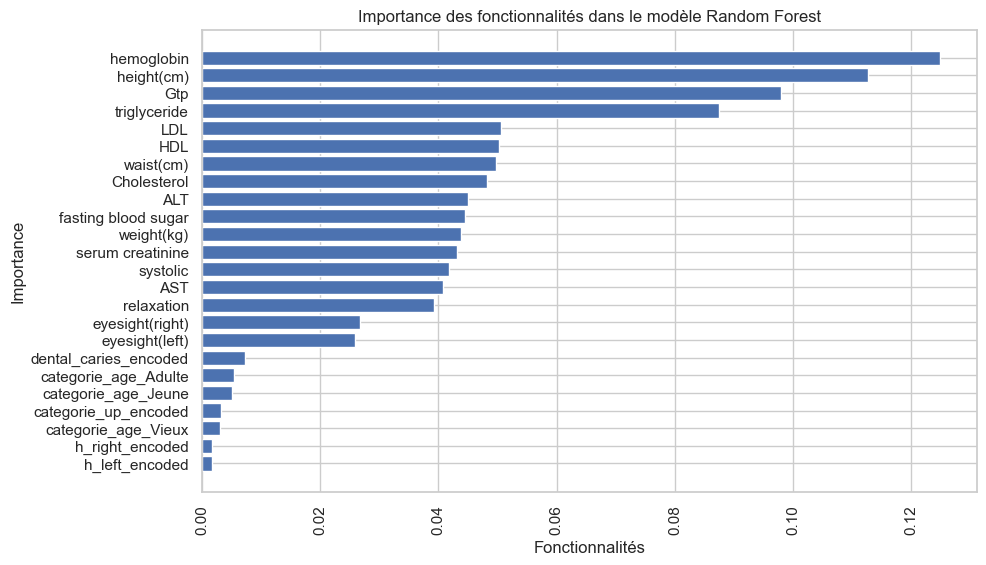

In [32]:
# Utilisation de la fonction pour visualiser l'importance des fonctionnalités dans un modèle Random Forest.
feature_importance(RandomForestClassifier(n_estimators=100, random_state=42))

#### Les variables *hemoglobin, heeight(cm), Gtp et triglyceride* ont  une plus grande influence sur les prédictions du modèle par rapport aux autres variables du modèle.